<a href="https://colab.research.google.com/github/Vengadore/Notebooks/blob/master/UnetSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
!rm -rf *

Mon Oct 26 22:22:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download data into local storage

In [2]:
from IPython.display import clear_output

In [3]:
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/ERgktnjHms9DroR01IFSAsEBGQipq3SG8sjTZUSEQuRK9Q?download=1"
!mv "ERgktnjHms9DroR01IFSAsEBGQipq3SG8sjTZUSEQuRK9Q?download=1" "DRIVE.rar"
!unrar x DRIVE.rar
!rm "DRIVE.rar"
clear_output()
print("DRIVE.rar Downloaded")

DRIVE.rar Downloaded


In [4]:
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/EeJjVR695xFMiVlTmZRPDh8BgZzjgU81MtJbNeyD3GyLQw?download=1"
!mv "EeJjVR695xFMiVlTmZRPDh8BgZzjgU81MtJbNeyD3GyLQw?download=1" STARE.zip
!unzip STARE.zip
!rm STARE.zip
clear_output()
print("STARE.zip Downloaded")

STARE.zip Downloaded


In [5]:
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/ESQgnFayDEZHtMe3MEvtOxYBj_FMmJhAzjyTM8RxF9m65w?download=1"
!mv "ESQgnFayDEZHtMe3MEvtOxYBj_FMmJhAzjyTM8RxF9m65w?download=1" Drive_histogram_modification.zip
!unzip Drive_histogram_modification.zip
!rm Drive_histogram_modification.zip
clear_output()
print("Drive_histogram_modification.zip Downloaded")

Drive_histogram_modification.zip Downloaded


In [6]:
!git clone --depth 1 https://github.com/Vengadore/Segmentation_OPTOS.git

Cloning into 'Segmentation_OPTOS'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 0), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


## Apply resize to all images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import os

In [2]:
path = "./"

#### Drive data

In [3]:
data = pd.read_csv(os.path.join(path,'training.csv'))
data_test = pd.read_csv(os.path.join(path,'test_1stmanual.csv'))

In [4]:
data['Original'] = data['Original'].apply(lambda x:os.path.join(path,"training/images/"+x))
data['GroundTruth'] = data['GroundTruth'].apply(lambda x:os.path.join(path,"training/1st_manual/"+x))

data_test['Original'] = data_test['Original'].apply(lambda x:os.path.join(path,"test/images/"+x))
data_test['GroundTruth'] = data_test['GroundTruth'].apply(lambda x:os.path.join(path,"test/1st_manual/"+x))

#### Stare data

In [5]:
Data_stare = pd.read_csv('./STARE/Data.csv')
Data_stare['Original'] = Data_stare['Original'].apply(lambda x:os.path.join(path,"STARE/Original/"+x))
Data_stare['GroundTruth'] = Data_stare['GroundTruth'].apply(lambda x:os.path.join(path,"STARE/GroundTruth/"+x))

#### Modified Drive data

In [6]:
Data_DriveM = pd.read_csv('./DRIVE_histogram_variations/Data.csv')
Data_DriveM['Original'] = Data_DriveM['Original'].apply(lambda x:os.path.join(path,"DRIVE_histogram_variations/images/"+x))
Data_DriveM['GroundTruth'] = Data_DriveM['GroundTruth'].apply(lambda x:os.path.join(path,"DRIVE_histogram_variations/GroundTruth/"+x))

In [7]:
data = data.append(Data_stare).reset_index()
data = data[['Original','GroundTruth']]
data = data.append(Data_DriveM).reset_index()
data = data[['Original','GroundTruth']]

In [8]:
## Save data csv
data.to_csv("Training_data.csv")
data_test.to_csv("Test_data.csv")

In [9]:
## Resize training images
import os
import cv2
for i in data['Original']:
  I = cv2.imread(i)
  (M,N,C) = I.shape
  I = cv2.resize(I,(int(N/M*584*4), 584*4),cv2.INTER_CUBIC)
  I = cv2.imwrite(i,I)

for i in data['GroundTruth']:
  I = cv2.imread(i)
  (M,N,C) = I.shape
  I = cv2.resize(I,(int(N/M*584*4), 584*4),cv2.INTER_NEAREST)
  thresh,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)
  I = cv2.imwrite(i,I)

In [10]:
#Resize Test_images
for i in data_test['Original']:
  I = cv2.imread(i)
  (M,N,C) = I.shape
  I = cv2.resize(I,(int(N/M*584*4), 584*4),cv2.INTER_CUBIC)
  I = cv2.imwrite(i,I)

for i in data_test['GroundTruth']:
  I = cv2.imread(i)
  (M,N,C) = I.shape
  I = cv2.resize(I,(int(N/M*584*4), 584*4),cv2.INTER_NEAREST)
  thresh,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)
  I = cv2.imwrite(i,I)

## Creation of dataloader

In [1]:
from Segmentation_OPTOS.Tools.Generators import Patch_generator
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import os

In [2]:
# Load data
data = pd.read_csv("Training_data.csv")
data_test = pd.read_csv("Test_data.csv")

In [3]:
def x_trans(X):
    #X = cv2.resize(X,(584*2, 565*2),cv2.INTER_CUBIC)
    #mean,std = cv2.meanStdDev(X)
    #_,_,C = X.shape
    #for i in range(C):
    #    X[:,:,i] = (X[:,:,i]-mean[i])/std[i]
    ## Change order of channels
    X = X.transpose(2,0,1)
    return X

def y_trans(X):
    # Change order of channels
    #X = cv2.resize(X,(584*3, 565*3),cv2.INTER_CUBIC)
    X = X.transpose(2,0,1)
    X = np.expand_dims(X[0,:,:],axis = 0)
    return X

Training_patches = Patch_generator.Generator_from_DataFrame(data,patch_size=(63,63),X = 'Original',
                                                   y = "GroundTruth",n_patches = 60,transforX=x_trans,transfory=y_trans)

Validation_patches = Patch_generator.Generator_from_DataFrame(data,patch_size=(63,63),X = 'Original',
                                                   y = "GroundTruth",n_patches = 60,transforX=x_trans,transfory=y_trans)

640 files found out of 640 in the DataFrame for X
640 files found out of 640 in the DataFrame for y
A generator object has been created with 60 per image
640 files found out of 640 in the DataFrame for X
640 files found out of 640 in the DataFrame for y
A generator object has been created with 60 per image


## Definition of the network

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.conv1 = nn.Conv2d(3,256,(3,3),stride = (1,1),padding=(1,1))
        self.norm1 = nn.BatchNorm2d(256)
        self.conv2 = nn.Conv2d(256,128,(3,3),stride = (1,1),padding=(1,1))
        self.norm2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128,64,(3,3),stride = (1,1),padding=(1,1))
        self.norm3 = nn.BatchNorm2d(64)
        self.max_pool = nn.MaxPool2d((2,2))
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = F.relu(self.conv3(x))
        x = self.norm3(x)
        x = self.max_pool(x)
        return x

class Decoder(torch.nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.conv1T = nn.ConvTranspose2d(64,64,(3,3),padding=(1,1))
        self.conv2T = nn.ConvTranspose2d(64,64,(3,3),stride=(2,2),padding=(1,1))
        self.conv3T = nn.ConvTranspose2d(64,128,(3,3),padding=(1,1))
        self.conv4T = nn.ConvTranspose2d(128,256,(3,3))
        self.conv5T = nn.ConvTranspose2d(256,1,(1,1))
    def forward(self,x):
        x = F.relu(self.conv1T(x))
        x = F.relu(self.conv2T(x))
        x = F.relu(self.conv3T(x))
        x = F.relu(self.conv4T(x))
        x = F.relu(self.conv5T(x))
        return x
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    def forward(self,x):
        x = self.encoder.forward(x)
        x = self.decoder.forward(x)
        return x

In [6]:
model = Model()

In [7]:
# Load Pretrained Model
model = torch.load("./Modelo_seg.ph")

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [8]:
model = model.to(device)

## Train Network

In [9]:
import torch.optim as optim
from sklearn.metrics import f1_score

def dice_coefficient(y_pred,y_true):
  y_true = y_true.view(1,-1)
  y_pred = y_pred.view(-1,1)

  #intersection = 2*torch.square(torch.matmul(y_true,y_pred))
  #A = torch.matmul(y_true,y_true.view(-1,1))
  #B = torch.matmul(y_pred.view(1,-1),y_pred)
  return torch.true_divide(2*torch.square(torch.matmul(y_true,y_pred)),torch.sum(torch.matmul(y_true,y_true.view(-1,1)),torch.matmul(y_pred.view(1,-1),y_pred).detach().cpu().numpy()))


  

In [10]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [11]:
from tqdm import tqdm

training_accuracy = []
training_loss = []

for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    ## Training loop for epoch
    progress_bar = pbar = tqdm(range(len(data)),ncols = 150)
    epoch_acc = 0.0
    for i in progress_bar:
        (X,y) = next(Training_patches)
        X = torch.FloatTensor(X).to(device)
        y = torch.FloatTensor(y).to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        
        # Accuracy
        #step_acc = torch.true_divide(torch.sum(outputs.gt(0.5) == y.gt(0.5)),y.view(-1).shape[0])
        y_true = y.gt(0.5).view(-1).detach().cpu().numpy()
        y_pred = outputs.gt(0.5).view(-1).detach().cpu().numpy()
        step_acc = f1_score(y_true, y_pred, average='weighted')
        epoch_acc += step_acc
        # print statistics
        step_loss = loss.item()
        running_loss += step_loss
        progress_bar.set_description(f"Accuracy: {step_acc:.4f}, Loss: {step_loss:.4f}")
    print(f"Epoch:{epoch+1} Loss:{running_loss/(i+1):.5f} Accuracy:{epoch_acc/(i+1):.5f} ")
    training_accuracy.append(epoch_acc/(i+1))
    training_loss.append(running_loss/(i+1))

print('Training DONE!')

  0%|                                                                                                                         | 0/640 [00:00<?, ?it/s]

Epoch:1 Loss:0.44846 Accuracy:0.86531 


Accuracy: 0.8417, Loss: 0.4033:   3%|██▋                                                                             | 21/640 [00:10<05:04,  2.03it/s]

KeyboardInterrupt: ignored

In [12]:
torch.save(model,"Modelo_seg.ph")

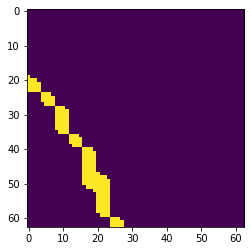

In [12]:
plt.imshow(y[1][0].detach().cpu().numpy())

In [13]:
y[1][0].detach().cpu().numpy().max()

1.0

In [15]:
from Segmentation_OPTOS.Tools.Generators.Patch_generator import Image2Generator,Generator2ImagePT

In [16]:
I = cv2.imread(data_test['Original'].iloc[-15])
I.shape

(2336, 2260, 3)

In [17]:
Test_generator = Image2Generator(I,patch_size=[127,127],batch_size=1)

A generator object containing all the image has been created


In [18]:
New_I = Generator2ImagePT(model,Test_generator)

In [19]:
New_I.shape

(2336, 2260)

In [21]:
New_I.min()

0.0

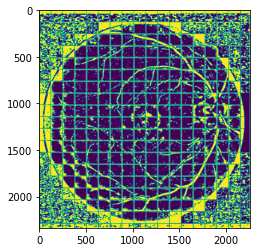

In [34]:
plt.imshow(New_I<0.1)

In [33]:
plt.imsave("Example.jpeg",New_I)

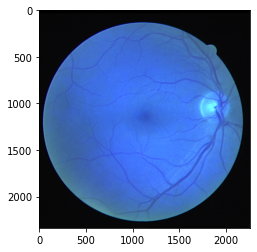

In [34]:
plt.imshow(I)